# Explore here

In [2]:
import os
import pandas as pd
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

True

In [10]:
#STEP 1) CLIENT AUTHORIZATION:

import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


client_id = "b39d03291cbd4cfbad1b66ef17c744ed"
client_secret = "87bf7024d96243eea0ddf847f4efd506"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

if client_credentials_manager and sp:
  print("Success")
elif client_credentials_manager: 
  print("Just Auth Manager")
elif sp:
   print("Just sp")
else:
  print("Not working :(")

Success


In [11]:
# STEP 6) ARTIST TOP 10 TRACKS (RAW DATA - SEE FILTERED DATA BELOW)

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys

artist_id = "0QWrMNukfcVOmgEU0FEDyD"  

response = sp.artist_top_tracks(artist_id)

try:
  for track in response["tracks"]:
      if response == sp.artist_top_tracks(artist_id): 
        tracks = response["tracks"]
        df_tracks = pd.DataFrame(tracks).head(10)
        print(df_tracks)
except Exception as e:
    print(f"Error: {e}")

                                               album  \
0  {'album_type': 'album', 'artists': [{'external...   
1  {'album_type': 'album', 'artists': [{'external...   
2  {'album_type': 'album', 'artists': [{'external...   
3  {'album_type': 'album', 'artists': [{'external...   
4  {'album_type': 'album', 'artists': [{'external...   
5  {'album_type': 'album', 'artists': [{'external...   
6  {'album_type': 'album', 'artists': [{'external...   
7  {'album_type': 'album', 'artists': [{'external...   
8  {'album_type': 'album', 'artists': [{'external...   
9  {'album_type': 'single', 'artists': [{'externa...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   
5  [{'external_urls': {'spotify': 'https://open

In [5]:
# STEP 6) ARTIST TOP 10 TRACKS (SUBSTRACTION OF REQUESTED DATA: name, popularity and duration)

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys

artist_id = "0QWrMNukfcVOmgEU0FEDyD"  

response = sp.artist_top_tracks(artist_id)

try: 
  response = sp.artist_top_tracks(artist_id) 
  tracks = response['tracks']
  top_10_tracks = [{'name': track['name'], 'popularity': track['popularity'], 'duration_ms': track['duration_ms']} for track in tracks[:10]]
  df_tracks = pd.DataFrame(top_10_tracks)
  print(df_tracks)

except Exception as e: 
  print(f"Error: {e}")

                                                name  popularity  duration_ms
0                                                 ❤️          58       188966
1  Never Gonna Be Alone (feat. Lizzy McAlpine & J...          54       250200
2  Bridge Over Troubled Water (feat. John Legend ...          46       352106
3  Wherever I Go (feat. Lawrence & Michael McDonald)          51       165240
4                 Little Blue (feat. Brandi Carlile)          48       265333
5          Time Alone With You (feat. Daniel Caesar)          45       256239
6  Witness Me (feat. Shawn Mendes, Stormzy & Kirk...          43       222120
7          All I Need (with Mahalia & Ty Dolla $ign)          48       245200
8                           Magic (feat. Emily King)          48       239480
9               The Sun Is In Your Eyes - Voice Memo          47       111875


In [12]:
# Sort the songs by increasing popularity and display the resulting top 3

df_tracks.sort_values("popularity", ascending=False)
df_tracks.head(3)

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,188966,False,{'isrc': 'GBAYE2100948'},{'spotify': 'https://open.spotify.com/track/3o...,https://api.spotify.com/v1/tracks/3oTYv0yShT4s...,3oTYv0yShT4sjuPncoUXfK,False,True,❤️,58,https://p.scdn.co/mp3-preview/0cd36d02d2474520...,6,track,spotify:track:3oTYv0yShT4sjuPncoUXfK
1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,250200,False,{'isrc': 'GBUM72203164'},{'spotify': 'https://open.spotify.com/track/27...,https://api.spotify.com/v1/tracks/275XKjLmQFuZ...,275XKjLmQFuZnxTvvtJ6VZ,False,True,Never Gonna Be Alone (feat. Lizzy McAlpine & J...,54,NaN,11,track,spotify:track:275XKjLmQFuZnxTvvtJ6VZ
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,352106,False,{'isrc': 'GBUM72310476'},{'spotify': 'https://open.spotify.com/track/4a...,https://api.spotify.com/v1/tracks/4asa5agcZmib...,4asa5agcZmibrmpTmb1q6m,False,True,Bridge Over Troubled Water (feat. John Legend ...,46,NaN,12,track,spotify:track:4asa5agcZmibrmpTmb1q6m


/tmp/ipykernel_2885/2551441028.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


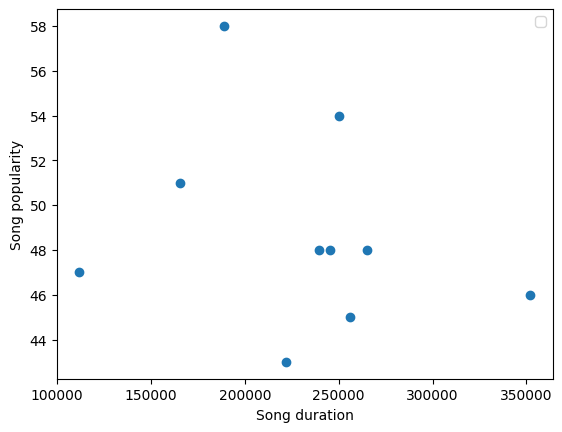

In [13]:
# Step 7: Analyze statistical relationship (scatter plot)
# Analyze potential relationship between duration and popularity by plotting a scatter plot and argue your answer

import scipy.stats as stats
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df_tracks.sort_values("popularity", ascending=False)
duration = df_tracks["duration_ms"]
popularity = df_tracks["popularity"]

plt.scatter(duration, popularity)
plt.xlabel("Song duration")
plt.ylabel("Song popularity")
plt.legend()
plt.show()


In [14]:
# Step 7: Analyze statistical relationship (Hypotesis testing via Pearsons correlation)

# Does duration have an impact in popularity? 
# Could we say that a song that lasts a short time may be more popular than a song that lasts longer?

# h0 = there isn't enough statistical evidence for the duration of a song having an impact on its popularity."
# h1 = there is statistical evidence for stating the duration of a song having an impact on its popularity."

import scipy.stats as stats

df_tracks.sort_values("popularity", ascending=False)
duration = df_tracks["duration_ms"]
popularity = df_tracks["popularity"]
significance = 0.05

correlation, p_value = stats.pearsonr(duration, popularity)

print(f"Correlation coefficient: {correlation}")
print(f"p-value: {p_value}")

if p_value < significance:
  if correlation > 0:
    print("Positive correlation: Longer songs tend to be more popular.")
  elif correlation < 0:
    print("Negative correlation: Shorter songs tend to be more popular.")
  else: 
    print("No significant correlation.")
elif p_value >= significance:
    print(f"Given that p-value {round(p_value, 4)} is bigger than the significance {significance}, we can conclude there is no significant correlation between duration and popularity.")


Correlation coefficient: -0.25051662063148417
p-value: 0.48511122775870447
Given that p-value 0.4851 is bigger than the significance 0.05, we can conclude there is no significant correlation between duration and popularity.
